In [1]:
from turtledemo.clock import tick

import pandas as pd
import numpy as np
from pandas import DataFrame
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
firms = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/firm_names.xlsx')
scores = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/Soc.xlsx', index_col = 0)
returns = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/monthlyreturns.xlsx', index_col = 0)
market_values = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/size.xlsx', index_col=0)
eu_risk_free_rates = pd.read_excel('https://github.com/0xMarmelade/FIN-429-Sustainable-finance/raw/main/eurf.xlsx', index_col=0)
eu_countrycodes = ['AL','AD', 'AM','AT','BA','BE','BG','CH','CY','DE','DK','EE','ES','FI','FR','GE', 'GB','GR','HR','HU','IE','IS','IT','LT','LV','MC','MK','MT','NL','NO','PL','PT','RO','RS', 'RU','SE','SI', 'TR', 'UA', 'MD', 'LI']

# Data cleaning and selection
Transposing table to get firms as rows, reset columns to dates

In [3]:
scores = scores.transpose()
scores.index.rename('ISIN', inplace=True)

firms.set_index("ISIN", inplace=True)

Join Social scores to firm's names and locations
Filter on firms that are located in Europe.
Variable  `eu_firm_names` containes the relevant firm names for our analysis.

In [4]:
scores = scores.join(firms, how="left", on="ISIN")
scores = scores[scores["Country"].isin(eu_countrycodes)]


Remove firms with unusual data:
- GB00B45TWN62 all empty or NaN
- GB00B979H674 NaN, 0 and one valid datapoint)
- DE000A2YPGA9 Only traded recently with abnormaly high volatility
- GB0031718066 Only has few data points and stratospherous returns
- IE00BLNN3691 (Weatherford International Ltd. Equity) has a weird extremely high return in end 2019. WILL KEEP FOR
df.loc[~df.index.duplicated(), :]

In [5]:
scores.dropna(how='all', inplace=True)
scores.drop(['GB00B45TWN62', 'GB00B979H674', 'NL0010157558', 'DE000A2YPGA9', 'GB0031718066'], axis='index', inplace=True)
eu_firm_names = scores.index

In [6]:
eu_firm_names = eu_firm_names[~eu_firm_names.duplicated()]


In [7]:
eu_firm_returns = returns[eu_firm_names]
eu_firm_market_values = market_values[eu_firm_names]
eu_firm_returns.head()

,AT000000STR1,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,...,RU000A0DKVS5,US68370R1095,US69338N2062,US7171402065,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US97263M1099,US98387E2054,VGG1890L1076
2002-01-31,NaN,0.004704,NaN,NaN,0.044299,0.028358,-0.031736,0.017735,0.011466,-0.000433,...,NaN,0.009666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-02-28,NaN,0.056424,NaN,NaN,-0.053178,0.016936,-0.100985,0.001924,0.036171,0.105286,...,NaN,0.143159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,0.013897,NaN,NaN,0.102579,-0.055194,0.000246,0.012976,-0.027588,0.141121,...,NaN,0.042653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-04-30,NaN,0.099059,NaN,NaN,0.130746,0.032542,0.279030,0.131208,0.052367,-0.127104,...,NaN,0.012889,NaN,NaN,NaN,NaN,NaN,0.069556,NaN,NaN
2002-05-31,NaN,0.085816,NaN,NaN,0.198617,0.019151,0.177818,-0.015824,0.103447,0.035419,...,NaN,-0.289719,NaN,NaN,NaN,NaN,NaN,-0.033756,NaN,NaN


IE00BLNN3691    1.342984
NL0012969182    0.050649
PLDINPL00011    0.047950
PTBES0AM0007    0.041001
GB0030927254    0.040823
dtype: float64

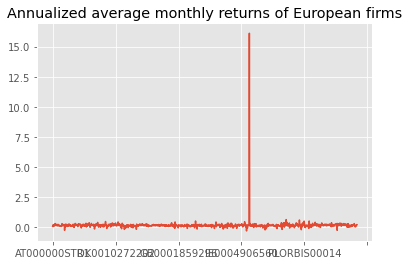

In [8]:
(eu_firm_returns.mean() * 12).plot(title='Annualized average monthly returns of European firms')
eu_firm_returns.mean().sort_values(ascending=False).head(5)

## Question 1
Compute and report the annualized average return and annualized volatility for all
individual assets. Compute the correlation between individual average returns and
volatility and comment on the observed correlation. (5 points)

In [9]:
(eu_firm_returns.mean() * 12).corr(eu_firm_returns.std())

0.9796950496220193

## Question 2
Form an equally-weighted and value-weighted portfolio with monthly rebalancing. Report the following statistics for both portfolios: annualized average return, annualized volatility, minimum return, maximum return, and Sharpe ratio. Plot the time series of returns for both portfolios. (10 points)


In [10]:
def portfolio_stats(weighted_returns: DataFrame, name: str) -> DataFrame:

    by_month_returns = weighted_returns.sum(axis='columns')
    
    portfolio = {}
    portfolio['AAR'] = by_month_returns.mean() * 12
    portfolio['Annualized volatility'] = by_month_returns.std() * math.sqrt(12)
    portfolio['Min return'] = by_month_returns.min()
    portfolio['Max return'] = by_month_returns.max()
    portfolio['Sharpe ratio'] = (portfolio['AAR'] - eu_risk_free_rates.values.mean()) / (portfolio['Annualized volatility'])

    return pd.DataFrame(portfolio, index=[name])

### Equally weighted portfolio

,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
Equally weighted portfolio,0.151841,0.232859,-0.253148,0.364805,0.647686


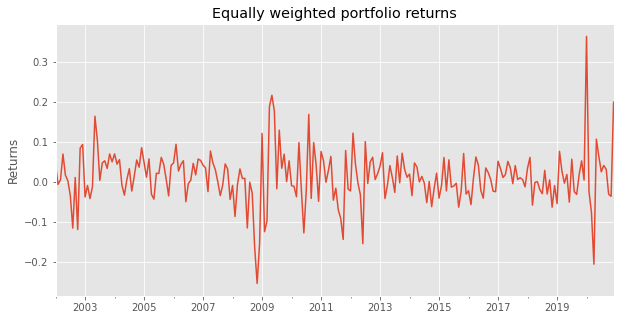

In [11]:
equal_weights_returns: pd.DataFrame = pd.DataFrame(index=eu_firm_returns.index, columns=eu_firm_returns.columns)

for index, row in eu_firm_returns.iterrows():
   equal_weights_returns.loc[index] = row.div(row.count()).transpose()
   

equal_weights_portfolio_stats = portfolio_stats(equal_weights_returns, 'Equally weighted portfolio')
equal_weights_returns.sum(axis='columns').plot(title='Equally weighted portfolio returns', figsize=(10,5)).set(ylabel='Returns')
equal_weights_portfolio_stats

,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
Value-weighted portfolio,0.090472,0.185216,-0.182094,0.189781,0.482955


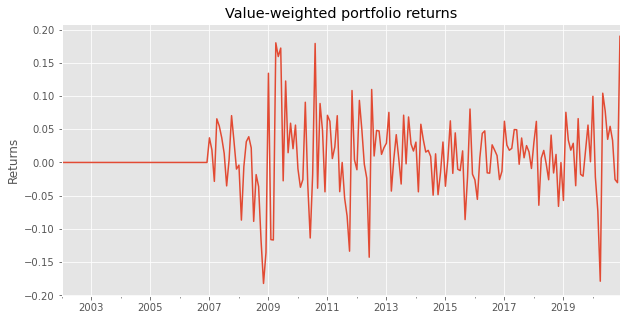

In [12]:
value_weights = pd.DataFrame(index=eu_firm_returns.index, columns=eu_firm_returns.columns)

for index, row in eu_firm_market_values.iterrows():
   value_weights.loc[index] = row.div(row.sum()).transpose()

value_weighted_portfolio = eu_firm_returns.mul(value_weights)
value_weighted_portfolio.sum(axis='columns').plot(title='Value-weighted portfolio returns', figsize=(10,5)).set(ylabel='Returns')
value_weighted_portfolio_stats = portfolio_stats(value_weighted_portfolio, 'Value-weighted portfolio')
value_weighted_portfolio_stats

<AxesSubplot:>

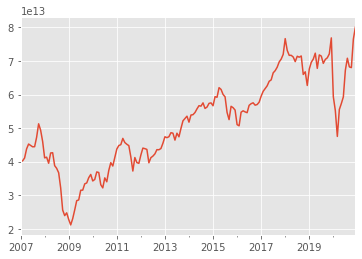

In [13]:
market_values.sum(axis=1).plot()

### Plotting Equal weighted and Value weighted portfolio.
(Correlation between returns is computed from 2007, at what point firm size data is available)

0.9439847151185622

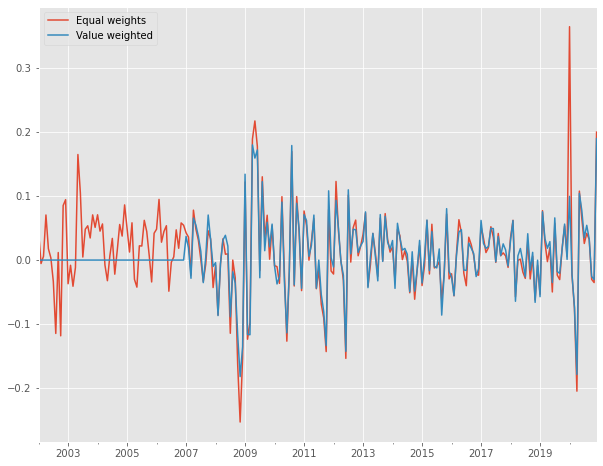

In [14]:
value_weighted_portfolio.sum(axis=1).plot(label='Value weighted', legend=True, ax=equal_weights_returns.sum(axis='columns').plot(label='Equal weights', legend=True), figsize=(10,8))
value_weighted_portfolio.sum(axis=1)[value_weighted_portfolio.index.year > 2006].corr(equal_weights_returns.sum(axis=1))

In [15]:
portfolios_question_2 = value_weighted_portfolio_stats.append(equal_weights_portfolio_stats)
portfolios_question_2

,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
Value-weighted portfolio,0.090472,0.185216,-0.182094,0.189781,0.482955
Equally weighted portfolio,0.151841,0.232859,-0.253148,0.364805,0.647686


### Question 3

Supposed that you invested 100% of your wealth in the asset with the highest annualized average return computed in point 1. Compare the annualized average return and annualized volatility of this one-asset portfolio with the equally-weighted and value weighted portfolios? What explains the differences between a one-asset portfolio and a portfolio composed of many stocks? What if you invest 100% of your wealth in the asset with the highest average return computed over the first 2 years? (10 points)


In [16]:
stock = eu_firm_returns['IE00BLNN3691']
(eu_firm_returns.mean() * 12).sort_values(ascending=False).head(5)

IE00BLNN3691    16.115811
NL0012969182     0.607790
PLDINPL00011     0.575401
PTBES0AM0007     0.492010
GB0030927254     0.489876
dtype: float64

In [17]:
pd.DataFrame(
    {
        'AAR': eu_firm_returns['NL0012969182'].mean() * 12,
        'Annualized volatility': eu_firm_returns['NL0012969182'].std() * math.sqrt(12),
        'Min return': eu_firm_returns['NL0012969182'].min(),
        'Max return': eu_firm_returns['NL0012969182'].max(),
        'Sharpe ratio': (eu_firm_returns['NL0012969182'].mean() - eu_risk_free_rates.values.mean()) / (eu_firm_returns['NL0012969182'].std())
    }, index=['NL0012969182']
)

,AAR,Annualized volatility,Min return,Max return,Sharpe ratio
NL0012969182,0.60779,0.460468,-0.214925,0.338791,0.373353


In [18]:
portfolios_question_3 = pd.DataFrame({'One stockss': pd.Series({ 'AAR': stock.mean() * 12,
                                                                 'Annualized volatility': stock.std() * math.sqrt(12),
                                                                 'Min return': stock.min(),
                                                                 'Max return': stock.max(),
                                                                 'Sharpe ratio': stock.std() * math.sqrt(12) / stock.mean()
                                                                 })})
portfolios_question_3['Equally weighted'] = equal_weights_portfolio_stats.sum()
portfolios_question_3['Value weighted'] = value_weighted_portfolio_stats.sum()
portfolios_question_3

,One stockss,Equally weighted,Value weighted
AAR,16.115811,0.151841,0.090472
Annualized volatility,70.510748,0.232859,0.185216
Min return,-0.766423,-0.253148,-0.182094
Max return,307.324324,0.364805,0.189781
Sharpe ratio,52.503033,0.647686,0.482955


In [19]:
(eu_firm_returns.groupby(eu_firm_returns.index.year).mean()*12)

,AT000000STR1,AT00000VIE62,AT0000606306,AT0000642806,AT0000652011,AT0000720008,AT0000730007,AT0000743059,AT0000746409,AT0000767553,...,RU000A0DKVS5,US68370R1095,US69338N2062,US7171402065,RU000A0JRKT8,RU000A0B6NK6,US92927K1025,US97263M1099,US98387E2054,VGG1890L1076
2002,NaN,0.306446,NaN,NaN,0.169887,0.252310,0.262217,0.184160,0.083247,0.023147,...,NaN,0.477639,NaN,NaN,NaN,NaN,NaN,-0.221748,NaN,NaN
2003,NaN,0.323249,NaN,NaN,0.753658,0.264772,0.613093,0.536681,0.318189,1.834532,...,NaN,0.741105,NaN,NaN,NaN,NaN,NaN,0.029649,NaN,NaN
2004,NaN,0.582461,NaN,0.211912,0.672439,0.426791,0.639393,0.706795,0.744155,0.771471,...,NaN,0.559660,NaN,NaN,NaN,NaN,NaN,-0.196143,NaN,NaN
2005,NaN,-0.055784,0.326565,0.084026,0.063427,0.282858,0.431139,0.824229,0.477570,2.179011,...,0.815759,0.225543,NaN,NaN,NaN,NaN,NaN,0.382316,1.381299,NaN
2006,NaN,0.453082,0.751541,0.374008,0.343322,0.221664,0.717103,0.037514,0.549949,-0.668030,...,1.136763,0.569410,NaN,NaN,NaN,NaN,NaN,1.072307,0.252488,NaN
2007,-0.605900,0.241018,0.326164,-0.189311,0.011226,0.159484,0.294750,0.328453,0.357584,0.759174,...,0.070804,0.871406,0.445412,0.734967,NaN,0.355849,-0.059612,0.960397,0.181690,NaN
2008,-1.167048,-0.944873,-1.493852,-2.269745,-0.951814,-0.646609,-0.783649,-0.895742,-0.410166,-0.809417,...,-0.862358,-1.125232,-1.821807,-0.627070,NaN,-1.678191,-0.978928,-1.350329,-1.199776,NaN
2009,1.057087,0.615633,1.261488,3.476772,1.335889,0.447323,1.169371,0.761066,0.282779,1.595421,...,1.307298,1.218537,2.663720,1.008074,NaN,1.700227,0.846432,1.624165,2.109322,NaN
2010,-0.204700,0.257811,-0.049842,-0.008006,0.109261,-0.109288,0.343615,-0.145042,-0.255077,-0.097858,...,0.521778,-0.195586,-0.003770,0.355437,NaN,0.196711,0.845085,0.259013,0.295166,NaN
2011,0.270200,-0.392054,-0.675990,0.036825,-0.725764,-0.102580,0.111261,0.052345,-0.108047,-0.223913,...,0.518200,0.000000,-0.351830,-0.443638,-0.656014,-0.344697,0.063262,0.378429,-0.379746,NaN


## Question 7

Compute and comment on the simple correlation between returns, volatility, size. (5points)

0.1129666880009748


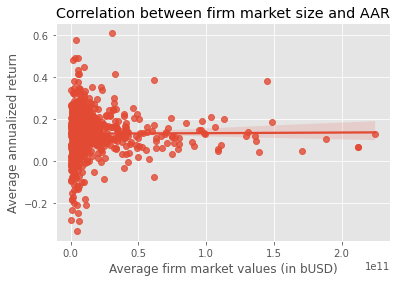

In [71]:
sns.regplot(x = pd.Series(eu_firm_market_values.mean(), name='Average firm market values (in bUSD)'), y = pd.Series(eu_firm_returns.mean() * 12, name='Average annualized return')).set(title='Correlation between firm market size and AAR')
print(eu_firm_returns.corrwith(eu_firm_market_values, axis=0).mean())

In [ ]:
eu_firm_market_values.drop('IE00BLNN3691', axis='columns', inplace=True)
eu_firm_returns.drop('IE00BLNN3691', axis='columns', inplace=True)

In [ ]:
sns.regplot(x = pd.Series(eu_firm_market_values.mean(), name='Average firm market values (in bUSD)'), y = pd.Series(eu_firm_returns.std() * math.sqrt(12), name='Average volatility of returns')).set(title='Correlation between firm market size and volatility')
print((eu_firm_returns.std() * math.sqrt(12)).corr(eu_firm_market_values.mean()).mean())

In [23]:
eu_firm_returns.mean().sort_values(ascending=False) * 12


NL0012969182    0.607790
PLDINPL00011    0.575401
PTBES0AM0007    0.492010
GB0030927254    0.489876
PLOPTTC00011    0.480663
                  ...   
PLGETBK00012   -0.233896
IT0005218752   -0.248984
SE0011256312   -0.283395
BE0974290224   -0.285611
IE00BBGT3753   -0.333834
Length: 967, dtype: float64

In [24]:
eu_firm_returns['GB0031718066'].plot()

KeyError: 'GB0031718066'

## Question 8

For this question, take the same 50 selected firms. You now create a minimum variance portfolio with monthly rebalancing with an additional constraint: you exclude the smallest firms (bottom tercile of the distribution of the firms' market capitalization in month t − 1). Report summary statistics on the performance of this portfolio and comment on the differences with the minimum variance from point 4. (15 points)

In [ ]:
"""
eu_firm_market_values_50 = eu_firm_market_values.sample(n = 50, axis = 'columns')
eu_firm_market_values_50_top = pd.DataFrame(index = eu_firm_market_values_50.index)

for index, row in eu_firm_market_values_50.iterrows():

    eu_firm_market_values_50_top.iloc[index] =
"""

## Question 9
For each time period, sort firms based on size into quintiles. Create equally-weighted and value-weighted portfolios for each time period and each size quintile. Report the average returns for each quintile portfolio as well as a portfolio that goes long in the lowest quintile and short the highest quintile. Comment on your results. What can explain the relationship between returns of your portfolio and rms' size? Repeat this exercise but sorting rms based on past stock returns. Compute past returns in month as the cumulated return of a rm between months t − 13 and t − 1. (15 points)

Creating quintile groups

In [25]:
quintile_weights = pd.DataFrame(index=eu_firm_market_values.index, columns=eu_firm_market_values.columns)

for index, row in eu_firm_market_values.iterrows():
    quintile_weights.loc[index] = pd.qcut(row, 5, labels=[1, 2, 3, 4, 5])

### Equally weighted portfolios within quintiles

In [56]:
equal_quintile_portfolios = pd.DataFrame()

for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
    quintile_equal_weights = pd.DataFrame(index=eu_firm_market_values.index, columns=eu_firm_market_values.columns)
    for index, row in quintile_weights[quintile_weights == i].iterrows():
        # We have to divide row by row to force skipping NaN values
        quintile_equal_weights.loc[index] = (row / (row * row.count())).T

    portfolio_results = quintile_equal_weights * eu_firm_returns
    portfolio_results = portfolio_results[portfolio_results.index.year >= 2007]

    if i == 1.0:
        test = portfolio_results

    equal_quintile_portfolios['Quintile ' + str(i)] = portfolio_stats(portfolio_results, "").sum(axis=0)

In [58]:
equal_quintile_portfolios

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.007905,0.078268,0.110527,0.133752,0.120009
Annualized volatility,0.308751,0.259121,0.233136,0.227889,0.220900
Min return,-0.333604,-0.290944,-0.240044,-0.226457,-0.202631
Max return,0.334897,0.257720,0.210212,0.196939,0.192570
Sharpe ratio,0.022296,0.298111,0.469710,0.582437,0.538654


### Value-weighted portfolios within quintiles

In [62]:
value_quintile_portfolios = pd.DataFrame()

for i in [1.0, 2.0, 3.0, 4.0, 5.0]:
    quintile_value_weights = pd.DataFrame(index=eu_firm_market_values.index, columns=eu_firm_market_values.columns)
    for index, row in eu_firm_market_values.iterrows():
        quintile_market_value = row[quintile_weights.loc[index] == i].sum()
        new_row = row[quintile_weights.loc[index] == i] / quintile_market_value
        quintile_value_weights.loc[index] = new_row

    portfolio_results = quintile_value_weights * eu_firm_returns
    portfolio_results = portfolio_results[portfolio_results.index.year >= 2007]
    value_quintile_portfolios['Quintile ' + str(i)] = portfolio_stats(portfolio_results, "").sum()

In [63]:
value_quintile_portfolios

,Quintile 1.0,Quintile 2.0,Quintile 3.0,Quintile 4.0,Quintile 5.0
AAR,0.040791,0.082634,0.112638,0.133438,0.119968
Annualized volatility,0.297101,0.257817,0.232411,0.228188,0.207998
Min return,-0.313009,-0.286092,-0.238930,-0.224286,-0.163166
Max return,0.335389,0.253718,0.208436,0.201124,0.183555
Sharpe ratio,0.133861,0.316554,0.480255,0.580298,0.571863


### Shorting the highest valued firms

In [65]:
shorting_equal_quintile_portfolios = {}

for i in [1.0, 5.0]:
    quintile_equal_weights = pd.DataFrame(index=eu_firm_market_values.index, columns=eu_firm_market_values.columns)
    for index, row in quintile_weights[quintile_weights == i].iterrows():
        # We have to divide row by row to force skipping NaN values
        quintile_equal_weights.loc[index] = (row / (row * row.count())).T

    portfolio_results = quintile_equal_weights * eu_firm_returns
    shorting_equal_quintile_portfolios['Quintile ' + str(i)] = portfolio_results[portfolio_results.index.year >= 2007]

Average return for the strategy

In [72]:
(shorting_equal_quintile_portfolios['Quintile 1.0'].sum(axis=1).mean() + (shorting_equal_quintile_portfolios['Quintile 5.0'].sum(axis=1) * -1).mean()) * 12

-0.11210444504005289